# Project of Analyze Data of Saudi Stock Exchange (Tadawul)

#### Problem Statement and Questions :

Using data science in the stock market is not new, but that doesn't apply for Saudi Stock Exchange (Tadawul), It needs to be explored and studied deeply. This project aims to analyze the Saudi Stock Market (Tadawul) data, as it answers some questions related to the data, such as: What is the day that achieves the highest trades? What companies have the highest stock price? What companies have the lowest stock price? Then I will build a model that predicts stock closing prices, I implement this project to pass the T5 Data Scientist Bootcamp.

### Import Libraries that will use in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

### Load Data

In [2]:
df = pd.read_csv("Tadawul_stcks.csv")
df2 = pd.read_csv("Tadawul_stcks_23_4.csv")
df = df2.append(df,ignore_index=True)
df.rename(columns={'trading_name ': 'trading_name', 'volume_traded ': 'volume_traded','no_trades ':'no_trades'}, inplace=True)
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0


In [3]:
df.shape

(600811, 14)

### Visualize Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600811 entries, 0 to 600810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   symbol         600811 non-null  int64  
 1   name           600811 non-null  object 
 2   trading_name   600811 non-null  object 
 3   sectoer        600811 non-null  object 
 4   date           600811 non-null  object 
 5   open           594194 non-null  float64
 6   high           593952 non-null  float64
 7   low            593952 non-null  float64
 8   close          600811 non-null  float64
 9   change         600811 non-null  float64
 10  perc_Change    600811 non-null  float64
 11  volume_traded  600811 non-null  float64
 12  value_traded   600811 non-null  float64
 13  no_trades      593120 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 64.2+ MB


In [5]:
df.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,600811.000000,594194.000000,593952.000000,593952.000000,600811.000000,600811.000000,600811.000000,6.008110e+05,6.008110e+05,593120.000000
mean,3954.561125,41.047237,41.778572,40.404850,40.768032,0.000115,0.031324,1.667169e+06,4.977714e+07,962.009735
std,2284.245266,86.266380,88.717059,84.126867,86.039931,4.756607,3.483438,5.460104e+06,1.466421e+08,3386.441587
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.100000,16.310000,15.900000,15.990000,-0.250000,-0.920000,1.490520e+05,4.100598e+06,159.000000
50%,4004.000000,26.400000,26.800000,26.000000,26.170000,0.000000,0.000000,4.334070e+05,1.204201e+07,379.000000
75%,5110.000000,46.300000,47.000000,45.700000,46.000000,0.250000,0.910000,1.266960e+06,3.536168e+07,905.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


In [6]:
df.open.isna().sum()


6617

In [7]:
df.high.isna().sum()

6859

In [8]:
df.low.isna().sum()

6859

In [9]:
df.no_trades.isna().sum()

7691

### Cleaning Data

In [10]:
df.dropna()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.80,31.45,31.60,0.25,0.80,230790.0,7.295881e+06,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.40,30.30,31.35,-0.35,-1.10,422695.0,1.311302e+07,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.30,31.30,31.70,-0.75,-2.31,266845.0,8.497563e+06,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.90,32.10,32.45,-0.25,-0.76,254463.0,8.271461e+06,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.80,32.45,32.70,0.50,1.55,199425.0,6.500652e+06,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600806,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.9,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
600807,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.3,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
600808,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.6,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
600809,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.8,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [11]:
Company = df.groupby('name').open.max()
x = Company
y = df['high']

In [12]:
new_df =df[df['no_trades'].isna()]
new_df

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
410749,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-05,61.70,61.70,60.60,61.00,-0.30,-0.49,8101466.0,4.954567e+08,NaN
410750,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-04,60.20,61.40,59.50,61.30,-0.40,-0.65,9326748.0,5.659671e+08,NaN
410751,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-03,61.00,61.80,60.60,61.70,2.00,3.35,8509603.0,5.205188e+08,NaN
410752,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-02,60.70,61.40,59.60,59.70,0.20,0.34,11089823.0,6.743387e+08,NaN
410753,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-01,60.00,60.50,58.70,59.50,-2.40,-3.88,10265006.0,6.127172e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422196,1150,Alinma Bank,ALINMA,Financials,2008-06-09,14.25,14.62,13.87,14.06,-0.19,-1.33,165363310.0,2.342107e+09,NaN
422197,1150,Alinma Bank,ALINMA,Financials,2008-06-08,15.37,15.75,14.06,14.25,-0.18,-1.25,451214654.0,6.706081e+09,NaN
422198,1150,Alinma Bank,ALINMA,Financials,2008-06-07,14.06,14.43,13.68,14.43,1.31,9.98,89221585.0,1.273346e+09,NaN
422199,1150,Alinma Bank,ALINMA,Financials,2008-06-04,12.56,13.12,12.37,13.12,1.12,9.33,234809131.0,3.012619e+09,NaN


In [13]:
df.dropna(subset=['no_trades'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593120 entries, 0 to 600810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   symbol         593120 non-null  int64  
 1   name           593120 non-null  object 
 2   trading_name   593120 non-null  object 
 3   sectoer        593120 non-null  object 
 4   date           593120 non-null  object 
 5   open           586503 non-null  float64
 6   high           586261 non-null  float64
 7   low            586261 non-null  float64
 8   close          593120 non-null  float64
 9   change         593120 non-null  float64
 10  perc_Change    593120 non-null  float64
 11  volume_traded  593120 non-null  float64
 12  value_traded   593120 non-null  float64
 13  no_trades      593120 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 67.9+ MB


In [15]:
new_df =df[df['open'].isna()]
new_df

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
634,2150,The National Company for Glass Industries,ZOUJAJ,Materials,2020-04-19,NaN,NaN,NaN,14.02,0.0,0.0,14260.0,200266.32,81.0
1750,1330,Abdullah A. M. Al-Khodari Sons Co.,ALKHODARI,Industrials,2020-04-23,NaN,NaN,NaN,5.39,0.0,0.0,0.0,0.00,0.0
1751,1330,Abdullah A. M. Al-Khodari Sons Co.,ALKHODARI,Industrials,2020-04-22,NaN,NaN,NaN,5.39,0.0,0.0,0.0,0.00,0.0
1752,1330,Abdullah A. M. Al-Khodari Sons Co.,ALKHODARI,Industrials,2020-04-21,NaN,NaN,NaN,5.39,0.0,0.0,0.0,0.00,0.0
1753,1330,Abdullah A. M. Al-Khodari Sons Co.,ALKHODARI,Industrials,2020-04-20,NaN,NaN,NaN,5.39,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,4100,Makkah Construction and Development Co.,MCDC,Real Estate,2003-02-27,NaN,NaN,NaN,27.75,0.0,0.0,995.0,27458.00,7.0
579360,4100,Makkah Construction and Development Co.,MCDC,Real Estate,2002-12-12,NaN,NaN,NaN,30.50,0.0,0.0,635.0,19356.00,2.0
587821,4230,Red Sea International Co.,RED SEA,Real Estate,2019-12-02,NaN,NaN,NaN,12.42,0.0,0.0,7682.0,95484.18,43.0
587897,4230,Red Sea International Co.,RED SEA,Real Estate,2019-08-08,NaN,NaN,NaN,13.72,0.0,0.0,20407.0,280208.14,80.0


In [16]:
df.dropna(inplace=True)

In [17]:
#Here we do not have any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586261 entries, 0 to 600810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   symbol         586261 non-null  int64  
 1   name           586261 non-null  object 
 2   trading_name   586261 non-null  object 
 3   sectoer        586261 non-null  object 
 4   date           586261 non-null  object 
 5   open           586261 non-null  float64
 6   high           586261 non-null  float64
 7   low            586261 non-null  float64
 8   close          586261 non-null  float64
 9   change         586261 non-null  float64
 10  perc_Change    586261 non-null  float64
 11  volume_traded  586261 non-null  float64
 12  value_traded   586261 non-null  float64
 13  no_trades      586261 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 67.1+ MB


In [18]:
df['date'] = pd.to_datetime(df.date)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586261 entries, 0 to 600810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   symbol         586261 non-null  int64         
 1   name           586261 non-null  object        
 2   trading_name   586261 non-null  object        
 3   sectoer        586261 non-null  object        
 4   date           586261 non-null  datetime64[ns]
 5   open           586261 non-null  float64       
 6   high           586261 non-null  float64       
 7   low            586261 non-null  float64       
 8   close          586261 non-null  float64       
 9   change         586261 non-null  float64       
 10  perc_Change    586261 non-null  float64       
 11  volume_traded  586261 non-null  float64       
 12  value_traded   586261 non-null  float64       
 13  no_trades      586261 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(3

In [20]:
df['sectoer'].unique()

array(['Energy', 'Materials', 'Industrials', 'Consumer Discretionary',
       'Communication Services', 'Consumer Staples', 'Health Care',
       'Financials', 'Information Technology', 'Utilities', 'Real Estate'],
      dtype=object)

In [21]:
df['sectoer'].value_counts()

Financials                146459
Materials                 143013
Consumer Staples           65207
Industrials                64602
Consumer Discretionary     55696
Real Estate                45429
Communication Services     21523
Health Care                18098
Energy                     15906
Utilities                   9455
Information Technology       873
Name: sectoer, dtype: int64

In [22]:
df['name'].unique()

array(['Saudi Arabia Refineries Co.', 'Saudi Arabian Oil Co.',
       'Rabigh Refining and Petrochemical Co.',
       'National Shipping Company of Saudi Arabia',
       'Aldrees Petroleum and Transport Services Co.',
       'Takween Advanced Industries Co.', 'Middle East Paper Co.',
       'Basic Chemical Industries Co.', 'Saudi Arabian Mining Co.',
       'United Wire Factories Co.', 'Al Yamamah Steel Industries Co.',
       'Saudi Steel Pipe Co.', 'Methanol Chemicals Co.',
       'National Petrochemical Co.', 'Saudi Basic Industries Corp.',
       'Saudi Arabian Fertilizer Co.', 'National Industrialization Co.',
       'National Gypsum Co.', 'The National Company for Glass Industries',
       'Alujain Holding Corp.',
       'Filing and Packing Materials Manufacturing Co.',
       'Arabian Pipes Co.', 'Nama Chemicals Co.',
       'National Metal Manufacturing and Casting Co.',
       'Zamil Industrial Investment Co.',
       'Saudi Industrial Investment Group',
       'Yanbu National

In [23]:
df['name'].value_counts()

Samba Financial Group                           4794
Saudi Basic Industries Corp.                    4794
Riyad Bank                                      4794
Arriyadh Development Co.                        4794
Batic Investments and Logistics Co.             4794
                                                ... 
Ataa Educational Co.                             186
Saudi Arabian Oil Co.                             97
Alinma Bank                                       35
Al Rajhi Bank                                     35
Dr. Sulaiman Al Habib Medical Services Group      28
Name: name, Length: 200, dtype: int64

In [24]:
df['trading_name'].value_counts()

TASNEE              4794
SAMBA               4794
RIBL                4794
BATIC               4794
ARDCO               4794
                    ... 
ATAA                 186
SAUDI ARAMCO          97
ALINMA                35
ALRAJHI               35
SULAIMAN ALHABIB      28
Name: trading_name, Length: 200, dtype: int64

#### Drop column (symbol) 

In [25]:
df.drop('symbol',axis='columns',inplace=True)

In [26]:
df.dtypes  # symbol remove

name                     object
trading_name             object
sectoer                  object
date             datetime64[ns]
open                    float64
high                    float64
low                     float64
close                   float64
change                  float64
perc_Change             float64
volume_traded           float64
value_traded            float64
no_trades               float64
dtype: object

In [27]:
df['day'] = df['date'].dt.weekday
df.head()

,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
0,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0,3
1,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0,2
2,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0,1
3,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0,0
4,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0,6


In [28]:
df['day'] = df['day'].astype(int)

### What days have the greatest number of deals?

Text(0, 0.5, 'Number of Trades')

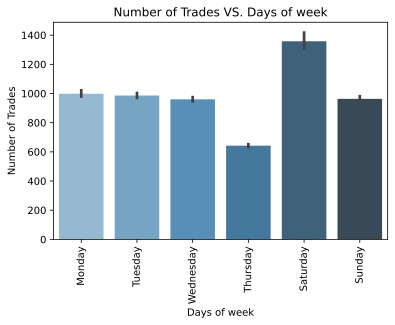

In [29]:
sns.barplot(x = 'day',y='no_trades',data=df, palette="Blues_d")
plt.xticks([0,1,2,3,4,5],['Monday','Tuesday','Wednesday','Thursday','Saturday','Sunday'],rotation=90)
plt.title('Number of Trades VS. Days of week')
plt.xlabel('Days of week')
plt.ylabel('Number of Trades')

### The sector which has the most deals 

Text(0, 0.5, 'Number of Trades')

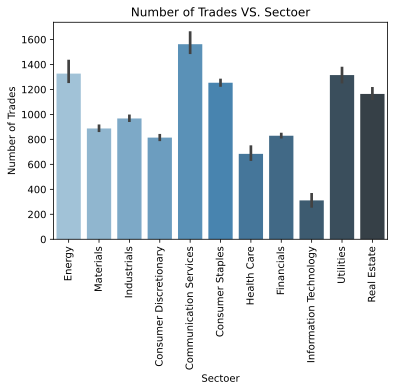

In [30]:
sns.barplot(x = 'sectoer',y='no_trades',data=df, palette="Blues_d")
plt.xticks(rotation=90)
plt.title('Number of Trades VS. Sectoer')
plt.xlabel('Sectoer')
plt.ylabel('Number of Trades')

In [31]:
df.sort_values("no_trades", ascending=False ,inplace = True)
df

,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
544024,Mobile Telecommunication Company Saudi Arabia,ZAIN KSA,Communication Services,2008-03-22,81.50,88.25,71.50,77.91,77.91,0.00,115608306.0,9.044469e+09,816526.0,5
31841,Saudi Arabian Mining Co.,MAADEN,Materials,2008-07-28,28.20,29.60,26.40,28.20,28.20,0.00,331054101.0,9.122116e+09,587262.0,0
14536,Rabigh Refining and Petrochemical Co.,PETRO RABIGH,Energy,2008-01-27,43.00,52.50,42.25,52.25,0.00,0.00,228520778.0,1.085658e+10,576072.0,6
122031,Northern Region Cement Co.,NORTHERN CEMENT,Materials,2013-02-05,18.00,68.00,17.75,30.00,20.00,200.00,234316831.0,5.985548e+09,540248.0,1
587752,Emaar The Economic City,EMAAR EC,Real Estate,2006-10-07,40.00,50.00,30.50,30.50,-69.50,-69.50,79549591.0,2.970939e+09,490155.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88810,National Metal Manufacturing and Casting Co.,MAADANIYAH,Materials,2002-09-19,3.80,3.80,3.80,3.80,0.15,4.11,9866.0,3.700000e+04,1.0,3
11379,Saudi Arabia Refineries Co.,SARCO,Energy,2002-10-19,5.90,5.90,5.90,5.90,-0.40,-6.35,18208.0,1.068100e+05,1.0,5
177716,Saudi Ceramic Co.,SAUDI CERAMICS,Industrials,2002-04-09,4.17,4.17,4.17,4.16,-0.12,-2.80,12000.0,5.000000e+04,1.0,1
246081,Fitaihi Holding Group,FITAIHI GROUP,Consumer Discretionary,2003-10-27,10.25,10.25,10.25,10.25,0.00,0.00,1971.0,2.006800e+04,1.0,0


In [32]:
com = df.groupby(['trading_name'])
com.first().sort_values("no_trades", ascending=False)
com.head()

,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
544024,Mobile Telecommunication Company Saudi Arabia,ZAIN KSA,Communication Services,2008-03-22,81.50,88.25,71.50,77.91,77.91,0.00,115608306.0,9.044469e+09,816526.0,5
31841,Saudi Arabian Mining Co.,MAADEN,Materials,2008-07-28,28.20,29.60,26.40,28.20,28.20,0.00,331054101.0,9.122116e+09,587262.0,0
14536,Rabigh Refining and Petrochemical Co.,PETRO RABIGH,Energy,2008-01-27,43.00,52.50,42.25,52.25,0.00,0.00,228520778.0,1.085658e+10,576072.0,6
122031,Northern Region Cement Co.,NORTHERN CEMENT,Materials,2013-02-05,18.00,68.00,17.75,30.00,20.00,200.00,234316831.0,5.985548e+09,540248.0,1
587752,Emaar The Economic City,EMAAR EC,Real Estate,2006-10-07,40.00,50.00,30.50,30.50,-69.50,-69.50,79549591.0,2.970939e+09,490155.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564974,Bonyan REIT Fund,BONYAN REIT,Real Estate,2019-03-14,8.81,9.44,8.80,9.00,0.20,2.27,531309.0,4.890924e+06,720.0,3
564318,Swicorp Wabel REIT Fund,SWICORP WABEL REIT,Real Estate,2018-12-04,9.15,9.60,8.85,8.99,-0.11,-1.21,614421.0,5.588271e+06,701.0,1
564251,Swicorp Wabel REIT Fund,SWICORP WABEL REIT,Real Estate,2019-03-07,8.52,8.69,8.45,8.47,-0.14,-1.63,1176543.0,1.004019e+07,601.0,3
564236,Swicorp Wabel REIT Fund,SWICORP WABEL REIT,Real Estate,2019-03-28,8.04,8.52,8.03,8.44,0.36,4.46,554672.0,4.640727e+06,575.0,3


### What companies have the highest stock prices? 

In [33]:
com_h_p = com
com_h_p = com_h_p.first().sort_values("high", ascending=False)
com_h_p = com_h_p.head(10)
com_h_p.reset_index(inplace=True)

In [34]:
com_h_p

,trading_name,name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
0,ANAAM HOLDING,Anaam International Holding Group,Consumer Staples,2006-07-02,3130.72,3797.39,3130.72,3797.39,333.34,9.62,756541.0,2.682636e+09,56991.0,6
1,SPM,Saudi Paper Manufacturing Co.,Materials,2006-06-14,498.83,526.96,352.10,372.91,372.91,0.00,3975218.0,1.609166e+09,115268.0,2
2,SFICO,Saudi Fisheries Co.,Consumer Staples,2007-01-10,330.80,337.72,281.84,293.81,-15.88,-5.13,5609691.0,1.787390e+09,37190.0,2
3,NAMA CHEMICALS,Nama Chemicals Co.,Materials,2006-09-13,319.75,333.25,273.25,312.84,9.56,3.15,7592327.0,2.385427e+09,33459.0,2
4,SAUDI CABLE,Saudi Cable Co.,Industrials,2006-02-12,265.86,282.67,260.85,277.59,18.50,7.14,6109317.0,1.657906e+09,16993.0,6
5,SARCO,Saudi Arabia Refineries Co.,Energy,2006-05-02,272.75,273.00,248.50,258.50,-8.50,-3.18,2573630.0,6.770421e+08,13918.0,1
6,WAFRAH,Wafrah for Industry and Development Co.,Consumer Staples,2006-08-27,241.12,257.97,239.18,245.01,7.78,3.28,6304280.0,1.565283e+09,25850.0,6
7,WAFA INSURANCE,Saudi Indian Company for Cooperative Insurance,Financials,2007-09-01,233.26,234.72,194.22,201.00,-12.32,-5.78,1634372.0,3.633484e+08,29310.0,5
8,SVCP,Saudi Vitrified Clay Pipes Co.,Industrials,2007-05-26,160.25,200.00,143.00,187.00,142.00,315.56,22941496.0,4.022523e+09,125392.0,5
9,CARE,National Medical Care Co.,Health Care,2013-03-13,81.00,200.00,70.00,122.00,95.00,351.85,66863394.0,6.479747e+09,406108.0,2


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ANAAM HOLDING'),
  Text(1, 0, 'SPM'),
  Text(2, 0, 'SFICO'),
  Text(3, 0, 'NAMA CHEMICALS'),
  Text(4, 0, 'SAUDI CABLE'),
  Text(5, 0, 'SARCO'),
  Text(6, 0, 'WAFRAH'),
  Text(7, 0, 'WAFA INSURANCE'),
  Text(8, 0, 'SVCP'),
  Text(9, 0, 'CARE')])

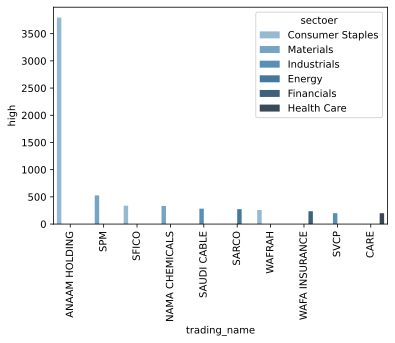

In [35]:
sns.barplot(x='trading_name', y='high' ,data= com_h_p, hue='sectoer' ,palette="Blues_d")
plt.xticks(rotation=90)
#plt.title('Number of Trades VS. Sectoer')
#plt.xlabel('Sectoer')
# plt.ylabel('Number of Trades')

### What companies have the lowest stock prices?

In [36]:
com_l_p = com
com_l_p = com_l_p.first().sort_values("low")
com_l_p = com_l_p.head(10)

In [37]:
com_l_p.reset_index(inplace=True)

In [38]:
com_l_p

,trading_name,name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
0,MASHAAR REIT,Al Mashaar REIT,Real Estate,2019-03-07,6.97,7.48,6.97,7.23,0.27,3.88,4841193.0,3.497082e+07,2707.0,3
1,MEFIC REIT,MEFIC REIT Fund,Real Estate,2019-12-30,7.80,7.98,7.79,7.86,0.07,0.90,7221290.0,5.708936e+07,3807.0,0
2,BONYAN REIT,Bonyan REIT Fund,Real Estate,2018-07-26,8.30,9.90,8.30,9.10,0.10,1.11,697579.0,6.394812e+06,1158.0,3
3,SEDCO CAPITAL REIT,SEDCO Capital REIT Fund,Real Estate,2018-05-02,8.64,9.09,8.52,8.70,-0.30,-3.33,703835.0,6.163654e+06,1321.0,2
4,DERAYAH REIT,Derayah REIT Fund,Real Estate,2018-03-26,9.31,9.35,9.00,9.00,-1.00,-10.00,6571047.0,5.998273e+07,2261.0,0
5,SWICORP WABEL REIT,Swicorp Wabel REIT Fund,Real Estate,2018-12-03,10.00,10.40,9.02,9.10,-0.37,-3.91,1117059.0,1.107352e+07,968.0,0
6,JADWA REIT SAUDI,Jadwa REIT Saudi Fund,Real Estate,2018-02-11,10.20,10.20,9.20,9.23,-0.77,-7.70,4435055.0,4.179816e+07,2262.0,6
7,Al RAJHI REIT,Al Rajhi REIT Fund,Real Estate,2018-03-20,9.52,10.06,9.52,9.62,-0.38,-3.80,8390138.0,8.256039e+07,5593.0,1
8,MULKIA REIT,Mulkia Gulf Real Estate REIT,Real Estate,2017-11-05,9.60,10.88,9.60,10.23,0.23,2.30,13347204.0,1.357647e+08,7028.0,6
9,ALAHLI REIT 1,AlAhli REIT Fund 1,Real Estate,2018-01-08,10.50,10.50,10.04,10.11,0.11,1.10,8619744.0,8.839379e+07,4903.0,0


### I will be foucsing on stocks in Communication Services Sector

In [42]:
df[df['sectoer']=='Communication Services']['trading_name'].unique()

array(['ZAIN KSA', 'ATHEEB TELECOM', 'SRMG', 'ETIHAD ETISALAT', 'TAPRCO',
       'STC'], dtype=object)

In [43]:
Com_sec = df[df['sectoer']=='Communication Services']
Com_sec.sort_values('date', inplace=True)
Com_sec = Com_sec.set_index('date')
Com_sec.head()

<ipython-input-43-e5d02ed08d85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Com_sec.sort_values('date', inplace=True)


,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
date,,,,,,,,,,,,,
2001-12-31,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,21.0,21.0,21.0,21.0,-31.0,-59.62,3750.0,77933.75,3.0,0
2002-01-01,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,21.0,20.5,20.5,20.5,-0.5,-2.38,5213.0,107898.75,6.0,1
2002-01-02,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,20.5,20.5,20.5,0.0,0.00,6250.0,129375.00,2.0,2
2002-01-03,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,20.5,20.5,20.5,0.0,0.00,25325.0,522320.00,5.0,3
2002-01-05,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,21.0,20.5,20.5,0.0,0.00,17425.0,359205.00,7.0,5


### Exploratory Data Analysis for Financials sector

In [44]:
Com_sec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21523 entries, 2001-12-31 to 2020-04-23
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           21523 non-null  object 
 1   trading_name   21523 non-null  object 
 2   sectoer        21523 non-null  object 
 3   open           21523 non-null  float64
 4   high           21523 non-null  float64
 5   low            21523 non-null  float64
 6   close          21523 non-null  float64
 7   change         21523 non-null  float64
 8   perc_Change    21523 non-null  float64
 9   volume_traded  21523 non-null  float64
 10  value_traded   21523 non-null  float64
 11  no_trades      21523 non-null  float64
 12  day            21523 non-null  int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 2.3+ MB


### Data Visualization for Financials Sector

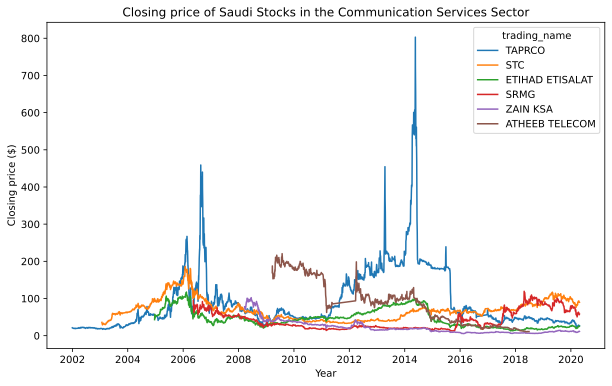

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=Com_sec.index, y="close", hue="trading_name",markers=True, data=Com_sec)
plt.title('Closing price of Saudi Stocks in the Communication Services Sector')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.show()


##### Through the above graph, we notice that the two oldest companies in the communication services sector are TAPRCO and STC, so I decided that I would conduct analyzes for these two companies.

### TAPRCO vs. STC

In [57]:
TAPRCO_df = df[df['trading_name']=='TAPRCO']
TAPRCO_df.sort_values('date', inplace=True)
TAPRCO_df = TAPRCO_df.set_index('date')
TAPRCO_df.describe()

<ipython-input-57-ff0dc6f32246>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TAPRCO_df.sort_values('date', inplace=True)


,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
count,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4.611000e+03,4.611000e+03,4611.000000,4611.000000
mean,91.808571,93.927419,90.112707,91.961160,-0.003043,0.052401,5.826033e+05,5.524078e+07,1206.984385,2.666667
std,83.668374,85.992817,81.707563,83.750857,5.953488,3.534383,8.953062e+05,1.154296e+08,1741.382758,2.188447
min,17.000000,17.000000,17.000000,17.000000,-80.000000,-59.620000,2.500000e+02,1.592500e+04,1.000000,0.000000
25%,42.500000,43.375000,41.500000,42.480000,-0.700000,-1.195000,8.382150e+04,5.784416e+06,236.500000,1.000000
50%,57.500000,58.500000,56.500000,57.500000,0.000000,0.000000,2.387070e+05,1.623859e+07,584.000000,2.000000
75%,126.000000,129.500000,122.750000,126.000000,0.600000,1.100000,6.436220e+05,5.031102e+07,1400.500000,5.000000
max,863.000000,883.000000,756.500000,803.000000,73.000000,11.760000,9.920626e+06,1.389762e+09,23141.000000,6.000000


In [58]:
STC_df = df[df['trading_name']=='STC']
STC_df.sort_values('date', inplace=True)
STC_df = STC_df.set_index('date')
STC_df.describe()

<ipython-input-58-843448fb6466>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STC_df.sort_values('date', inplace=True)


,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
count,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4.466000e+03,4.466000e+03,4466.000000,4466.000000
mean,69.790137,70.590439,69.042521,69.845208,0.042183,0.037785,2.241216e+06,1.802651e+08,1127.461263,2.648231
std,28.398943,28.949294,27.903463,28.436665,2.141673,1.764626,3.964645e+06,3.650752e+08,1600.892708,2.184562
min,28.500000,29.750000,28.500000,29.000000,-15.250000,-10.280000,3.329600e+04,2.351837e+06,48.000000,0.000000
25%,45.800000,46.225000,45.500000,45.900000,-0.430000,-0.660000,4.754938e+05,2.618602e+07,324.000000,1.000000
50%,66.000000,66.750000,65.250000,66.000000,0.000000,0.000000,9.148000e+05,5.215328e+07,576.000000,2.000000
75%,82.250000,83.000000,81.475000,82.250000,0.500000,0.730000,2.174102e+06,1.605239e+08,1299.750000,5.000000
max,193.500000,193.500000,181.500000,186.000000,92.000000,10.360000,4.855156e+07,4.531583e+09,21064.000000,6.000000


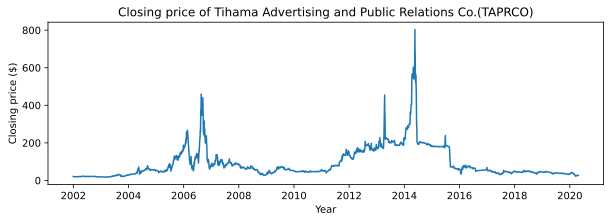

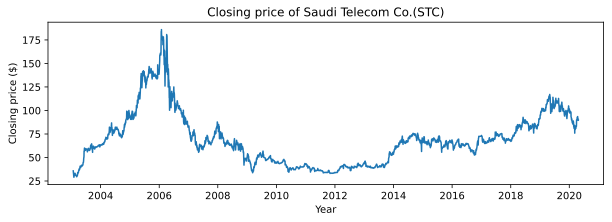

In [63]:
plt.figure(figsize=(10, 3))
plt.plot(TAPRCO_df['close'])
plt.title('Closing price of Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(STC_df['close'])
plt.title('Closing price of Saudi Telecom Co.(STC)')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

### I will calculate the Close prirce diffrence for these companies (TAPRCO and STC) by using diff() function which is calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row).

In [66]:
TAPRCO_df['close_diff'] = TAPRCO_df['close'].diff()
STC_df['close_diff'] = STC_df['close'].diff()

/Users/noufsf19/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


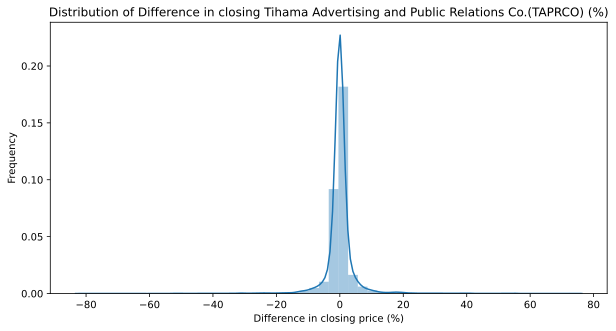

/Users/noufsf19/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


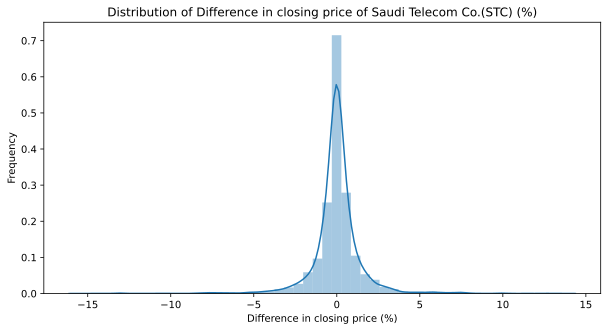

In [72]:
plt.figure(figsize=(10, 5))
sns.distplot(TAPRCO_df['close_diff'])
plt.title('Distribution of Difference in closing Tihama Advertising and Public Relations Co.(TAPRCO) (%)')
plt.ylabel('Frequency')
plt.xlabel('Difference in closing price (%)')
plt.show()

plt.figure(figsize=(10, 5))
sns.distplot(STC_df['close_diff'].dropna())
plt.title('Distribution of Difference in closing price of Saudi Telecom Co.(STC) (%)')
plt.ylabel('Frequency')
plt.xlabel('Difference in closing price (%)')
plt.show()

<ipython-input-79-892a2d476e29>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(TAPRCO_df.corr(), dtype = np.bool))


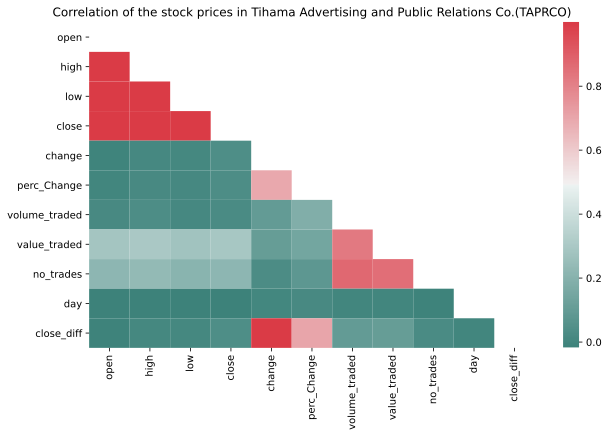

In [79]:
fig, axs = plt.subplots(figsize = (10, 6)) 
mask = np.triu(np.ones_like(TAPRCO_df.corr(), dtype = np.bool))
sns.heatmap(TAPRCO_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation of the stock prices in Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.show()

<ipython-input-78-1048b9847b86>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(STC_df.corr(), dtype = np.bool))


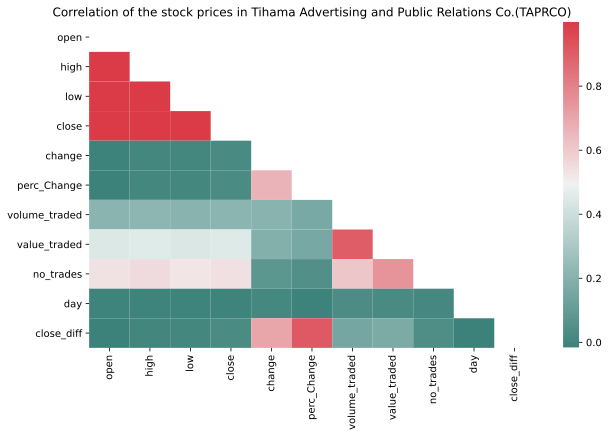

In [78]:
fig, axs = plt.subplots(figsize = (10, 6)) 
mask = np.triu(np.ones_like(STC_df.corr(), dtype = np.bool))
sns.heatmap(STC_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation of the stock prices in Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.show()

# Modeling

### I will build 2 model (linear regresion, logistic regresion) by using cross validation, then I will choose the best one.

I will break the data into 3 portions: 60% for training, 20% for validation (used to select the model), 20% for final testing evaluation.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
X, y = df.drop('price',axis=1), df['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)